# OpenMP сортировка слиянием

In [17]:
import pandas as pd
from matplotlib import pyplot as plt

Загрузка данных о времени из csv файла, в который записаны результаты экспериментов (по 10 на каждый набор входных данных) и размещение их в удобном для дальнейшего использования двойном массиве (с усреднением по 10 экспериментам)

In [18]:
dataFrame = pd.read_csv ("results.csv", header = None, delim_whitespace = True )
measures = 10

initialDataList = [[dataFrame.iloc[i, 0], dataFrame.iloc[i, 3]] for i in range (len (dataFrame))]
dataList = []

for i in range (len (initialDataList) // measures) :
    
    averageTime = 0
    for x in initialDataList[i*measures : (i+1)*measures] : averageTime += x[0]
    averageTime /= measures
    
    dataList.append ([initialDataList[i*measures][1], averageTime])


Разбиение результатов экспериментов по удобным массивам для дальнейшего построения графиков

In [19]:
P = [1, 2, 4, 8, 16]

T_P = [dataList[i][1] for i in range (0, len (dataList))]                   # T(P) при фиксированных N
S_P = [T_P[0] / T_P[i] for i in range (0, len (dataList))]
E_P = [S_P[i] / P[i] for i in range (0, len (dataList))]

Вспомогательная функция для рисования графика 

In [20]:
def drawPlot (number, Xarray, Yarray, xlabel, ylabel, xscale, yscale, legend = None) :
    
    plt.subplot (2, 2, number)

    plt.xscale (xscale)
    plt.yscale (yscale)

    plt.plot (Xarray, Yarray, linestyle = 'solid', marker = 'o', markersize = 10)

    
    plt.xlabel (xlabel, fontsize = 17)
    plt.ylabel (ylabel + '(' + xlabel + ')', fontsize = 17)
    plt.title ("Зависимость " + ylabel + '(' + xlabel + ')', fontsize = 20)

Финальные графики

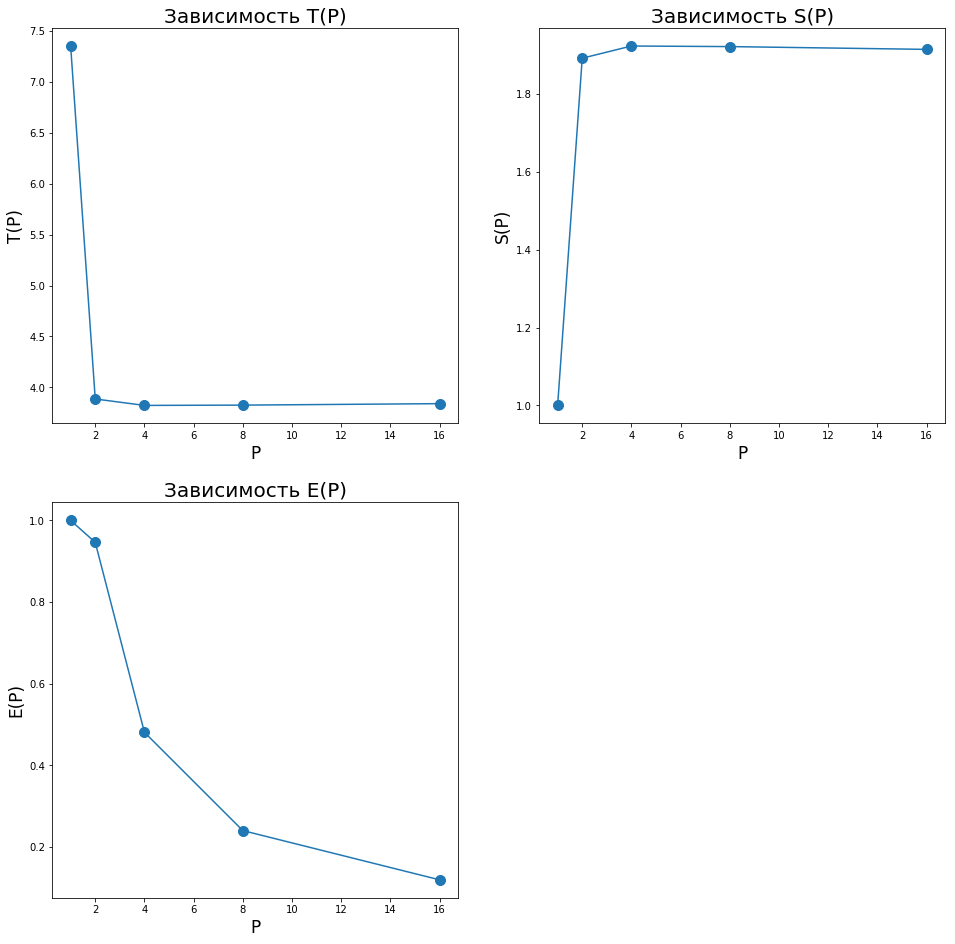

In [21]:
plt.figure (1, figsize = (16, 16))

drawPlot (1, P, T_P, 'P', 'T', 'linear', 'linear')
drawPlot (2, P, S_P, 'P', 'S', 'linear', 'linear')
drawPlot (3, P, E_P, 'P', 'E', 'linear', 'linear')

plt.show()